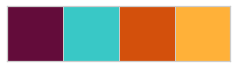

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='white')
sns.set(style='whitegrid',
       color_codes = True)
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, KFold
import statsmodels.formula.api as smf

In [2]:
%store -r weather_df 

In [3]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.000000,13.0,1006.300000,1004.4,2.000000,5.0,26.600000,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.000000,8.0,1012.900000,1012.1,1.000000,1.0,20.300000,27.0,No,No
6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,Unknown,...,55.158316,7.0,1017.995137,1011.6,3.298969,1.0,18.084507,32.7,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.000000,22.0,1012.300000,1009.2,1.000000,6.0,28.700000,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.000000,22.0,1012.700000,1009.1,1.000000,5.0,29.100000,35.6,No,No


In [4]:
weather_df.round(2);

In [5]:
weather_df.info() # Looks like Temperature, Wind, Humidity, Pressure, cloud appearance and Rain are features recorded

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 6049 to 2950
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  object        
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  object        
 10  WindDir3pm     142193 non-null  object        
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15 

In [6]:
weather_df['Year'] = weather_df['Date'].dt.year

In [7]:
weather_df['Month'] = weather_df['Date'].dt.month

In [8]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1006.300000,1004.4,2.000000,5.0,26.600000,33.4,No,No,2009,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.900000,1012.1,1.000000,1.0,20.300000,27.0,No,No,2009,1
6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,Unknown,...,1017.995137,1011.6,3.298969,1.0,18.084507,32.7,No,No,2009,1
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1012.300000,1009.2,1.000000,6.0,28.700000,34.9,No,No,2009,1
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1012.700000,1009.1,1.000000,5.0,29.100000,35.6,No,No,2009,1


In [9]:
import calendar
weather_df['Month_Name'] = weather_df['Month'].apply(lambda x: calendar.month_abbr[x])


In [10]:
weather_df = weather_df.drop(columns = ['Date'])

In [11]:
weather_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Month_Name'],
      dtype='object')

In [12]:
weather_df = weather_df[['Month_Name', 'Year','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]

In [13]:
weather_df.head()

,Month_Name,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Jan,2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,20.000000,13.0,1006.300000,1004.4,2.000000,5.0,26.600000,33.4,No,No
6050,Jan,2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,30.000000,8.0,1012.900000,1012.1,1.000000,1.0,20.300000,27.0,No,No
6051,Jan,2009,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,...,55.158316,7.0,1017.995137,1011.6,3.298969,1.0,18.084507,32.7,No,No
6052,Jan,2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,42.000000,22.0,1012.300000,1009.2,1.000000,6.0,28.700000,34.9,No,No
6053,Jan,2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,37.000000,22.0,1012.700000,1009.1,1.000000,5.0,29.100000,35.6,No,No


### Over the years

In [14]:
year_weather = weather_df.groupby([weather_df['Year']]).mean()
year_weather


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Year,,,,,,,,,,,,,,,,
2007,12.545902,25.086885,3.219672,5.859016,8.086885,40.918033,9.606557,16.803279,69.557377,45.786885,1016.772131,1014.050820,4.704918,4.885246,17.267213,23.455738
2008,12.482517,22.917888,2.303921,5.388412,7.911202,41.775362,14.037714,19.415585,65.522188,49.391535,1015.648341,1013.204367,4.348316,4.366739,16.922832,21.336495
2009,12.150858,23.260036,2.160873,5.467638,7.686381,41.464905,14.464418,19.479622,67.330708,50.180808,1016.940017,1014.559765,4.351194,4.364760,16.910309,21.748149
2010,12.117467,22.614918,2.706431,4.820266,7.177646,39.525606,13.863204,18.451572,70.771315,53.888480,1018.221137,1015.898740,4.623106,4.733170,16.665908,21.141322
2011,12.032382,22.558278,2.809980,4.891856,7.177212,39.910772,14.096840,18.407313,70.545191,53.821829,1017.359649,1015.119410,4.591436,4.634639,16.617293,21.081914
2012,11.241009,22.361611,2.406171,4.933599,7.448792,39.873061,13.982585,18.557344,68.899015,51.483402,1018.035341,1015.617923,4.420910,4.520098,16.196581,20.900113
2013,11.909818,23.314113,2.266194,5.414963,7.567946,40.744745,14.281836,18.981864,67.544065,50.247616,1017.191340,1014.725895,4.496773,4.516302,16.917696,21.778491
2014,12.402651,23.783723,1.961963,5.641081,7.611508,40.032442,13.852327,18.518758,67.819452,50.302836,1017.969484,1015.510992,4.618678,4.498237,17.319304,22.258251
2015,12.213860,23.508195,2.140250,5.566327,7.539173,39.610145,13.826413,18.382651,68.329765,50.721337,1019.082848,1016.632864,4.644658,4.596596,17.109451,21.973603


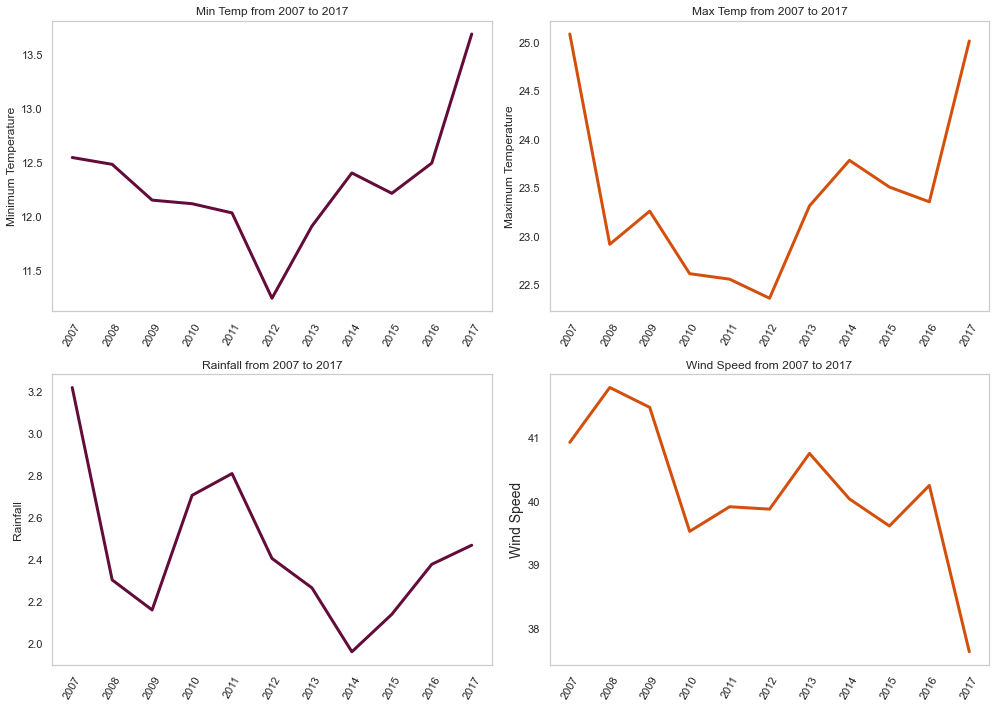

In [15]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.plot(year_weather.MinTemp , color='#630C3A', linewidth = 3)
plt.ylabel('Minimum Temperature')
plt.title('Min Temp from 2007 to 2017')
plt.grid(False)
plt.xticks(year_weather.index, rotation=60)

plt.subplot(222)
plt.plot(year_weather.MaxTemp, color='#D3500C', linewidth = 3)
plt.title('Max Temp from 2007 to 2017')
plt.ylabel('Maximum Temperature')
plt.grid(False)
plt.xticks(year_weather.index,rotation=60)

plt.subplot(223)
plt.plot(year_weather.Rainfall, color='#630C3A', linewidth = 3)
plt.ylabel('Rainfall')
plt.title('Rainfall from 2007 to 2017')
plt.grid(False)
plt.xticks(year_weather.index,rotation=60)

plt.subplot(224)
plt.plot(year_weather.WindGustSpeed, color='#D3500C', linewidth = 3)
plt.title('Wind Speed from 2007 to 2017')
plt.ylabel('Wind Speed', fontsize = 14)
plt.grid(False)
plt.xticks(year_weather.index, rotation=60)

plt.tight_layout()
plt.show()

## Rainfall and Temperature

In [16]:
pd.crosstab(weather_df.Rainfall, weather_df.Location)


Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Rainfall,,,,,,,,,,,,,,,,,,,,,
0.0,1986,1657,1998,2661,1905,1658,1944,2015,1628,2410,...,2228,2124,1308,2140,1351,1639,1468,1492,1901,2597
0.1,0,8,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
0.2,135,133,198,42,237,279,323,214,130,187,...,105,127,40,100,228,304,118,311,126,91
0.3,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0.4,85,89,70,29,57,112,82,83,106,58,...,69,53,22,66,81,109,53,87,84,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
268.6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
278.4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


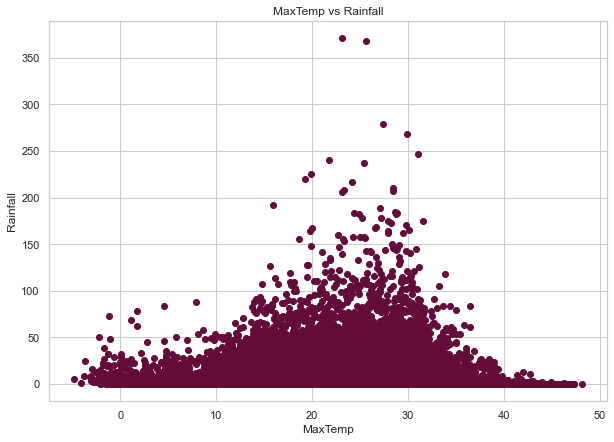

In [17]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(weather_df.MaxTemp,
            weather_df.Rainfall)
plt.title("MaxTemp vs Rainfall")
plt.ylabel("Rainfall")
plt.xlabel("MaxTemp");

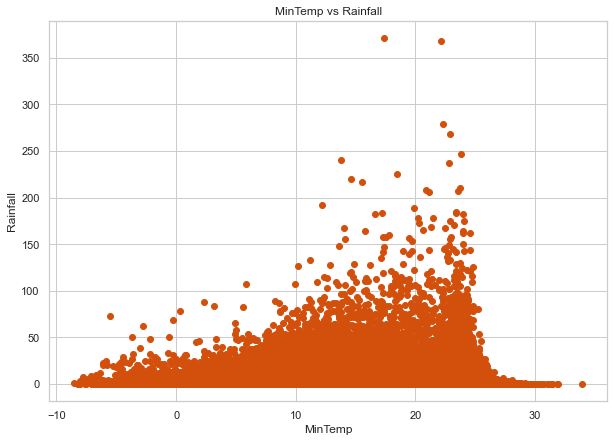

In [18]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(weather_df.MinTemp,
            weather_df.Rainfall, color=["#D3500C"])
plt.title("MinTemp vs Rainfall")
plt.ylabel("Rainfall")
plt.xlabel("MinTemp");

## Scoping out classification viability


In [19]:
Numerical = []
for column in weather_df.columns:
    if weather_df [column].dtype != 'O':
        Numerical.append(column)


Numerical

['Year',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

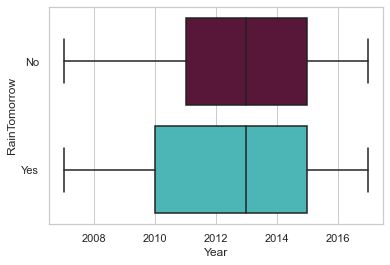

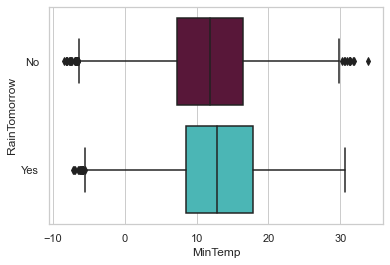

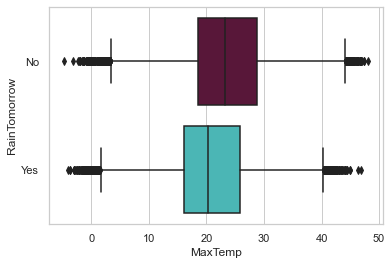

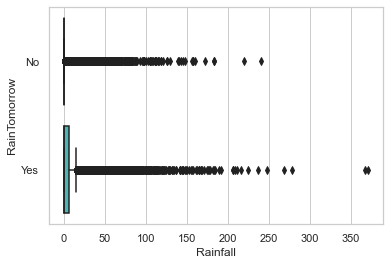

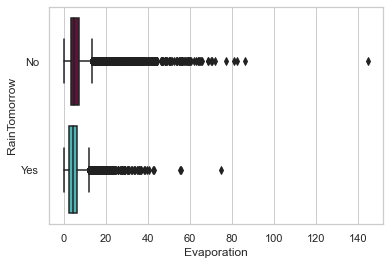

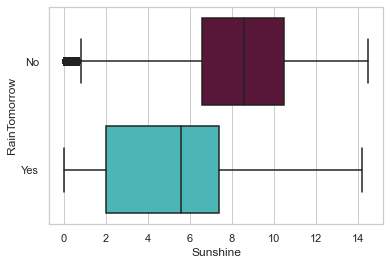

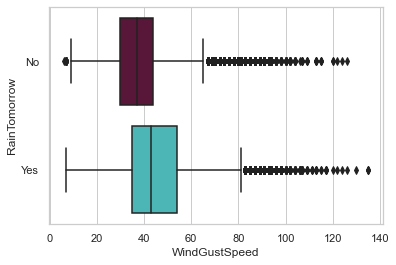

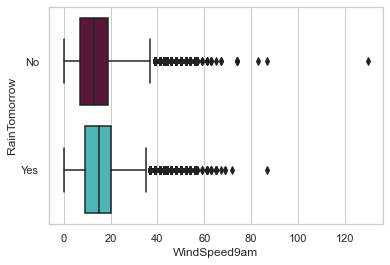

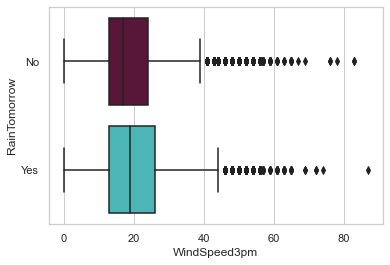

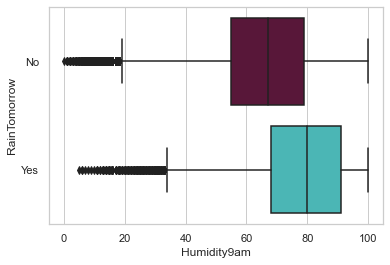

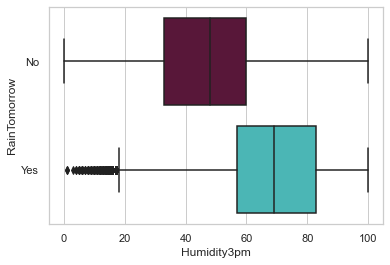

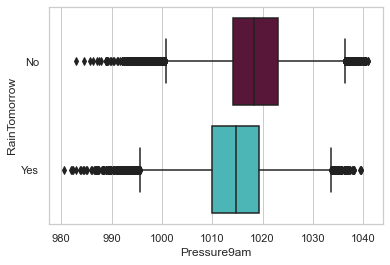

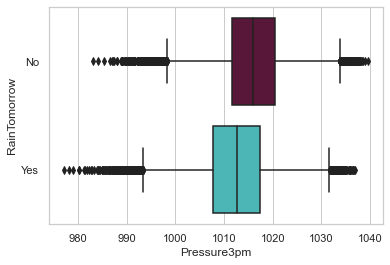

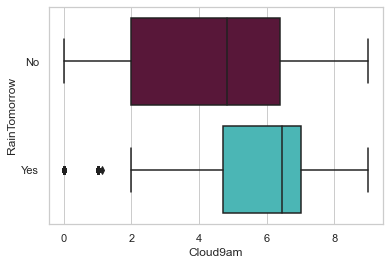

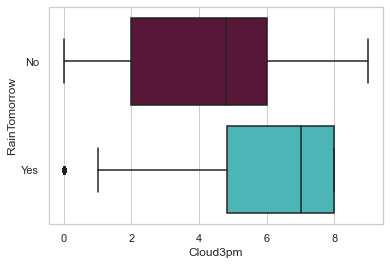

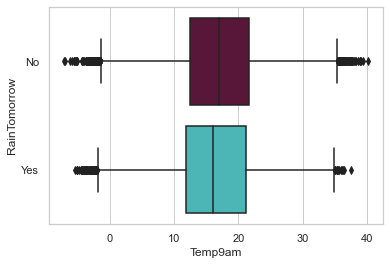

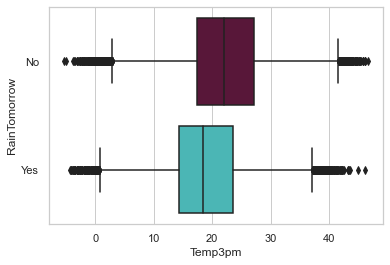

In [20]:
for var in Numerical:
    sns.boxplot(x = weather_df[var], y = weather_df['RainTomorrow'] )
    plt.show()

In [21]:
weather_df_1 = weather_df.copy()

In [22]:
%store weather_df_1

Stored 'weather_df_1' (DataFrame)


In [23]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
weather_df['RainTomorrow']= le.fit_transform(weather_df['RainTomorrow'])
weather_df['RainToday']= le.fit_transform(weather_df['RainToday'])
weather_df['Location']= le.fit_transform(weather_df['Location'])
weather_df['WindGustDir']= le.fit_transform(weather_df['WindGustDir'])
weather_df['WindDir9am']= le.fit_transform(weather_df['WindDir9am'])
weather_df['WindDir3pm']= le.fit_transform(weather_df['WindDir3pm'])
weather_df['Month_Name']= le.fit_transform(weather_df['Month_Name'])

## Target Distribution

In [24]:
weather_df['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

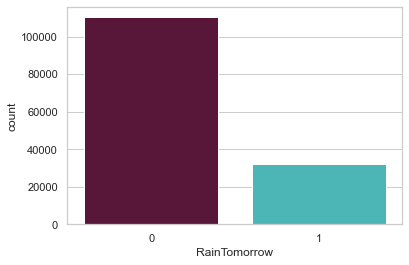

In [25]:
ax = sns.countplot(x="RainTomorrow", data=weather_df) ## There is some class imbalance


## Correlation Matrix

In [26]:
weather_df.corr()

,Month_Name,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Month_Name,1.000000,-0.034580,-0.000750,-0.095480,-0.070794,-0.020888,-0.012644,0.002378,0.016549,0.032180,...,-0.046457,-0.011905,0.045368,0.039953,-0.013873,-0.012537,-0.061773,-0.074901,-0.007279,-0.006753
Year,-0.034580,1.000000,0.022265,0.040289,0.058646,-0.009188,0.060908,0.008671,-0.025556,-0.034932,...,0.009756,-0.007553,0.029223,0.024705,0.051705,0.026161,0.045114,0.057405,-0.011926,-0.012039
Location,-0.000750,0.022265,1.000000,-0.006398,-0.020472,-0.003195,0.038292,-0.006571,-0.002010,0.070184,...,-0.002037,0.007198,0.036523,0.046208,0.018212,-0.004328,-0.015524,-0.023351,-0.003184,-0.003579
MinTemp,-0.095480,0.040289,-0.006398,1.000000,0.735413,0.103526,0.436614,0.069832,-0.148049,0.173441,...,-0.235012,0.000632,-0.431290,-0.439127,0.049793,-0.001295,0.900718,0.708775,0.055557,0.083506
MaxTemp,-0.070794,0.058646,-0.020472,0.735413,1.000000,-0.074220,0.543657,0.395665,-0.218206,0.066539,...,-0.503560,-0.507880,-0.321037,-0.407398,-0.239974,-0.245471,0.885599,0.980608,-0.227814,-0.159165
Rainfall,-0.020888,-0.009188,-0.003195,0.103526,-0.074220,1.000000,-0.054596,-0.204997,0.042100,0.127954,...,0.221970,0.249913,-0.162195,-0.121768,0.176753,0.154600,0.009898,-0.076511,0.500017,0.237019
Evaporation,-0.012644,0.060908,0.038292,0.436614,0.543657,-0.054596,1.000000,0.301201,-0.086025,0.185336,...,-0.463796,-0.355772,-0.260407,-0.280220,-0.146038,-0.155454,0.510924,0.526028,-0.172234,-0.109100
Sunshine,0.002378,0.008671,-0.006571,0.069832,0.395665,-0.204997,0.301201,1.000000,-0.067297,-0.023070,...,-0.433424,-0.530871,0.023397,-0.028625,-0.539985,-0.566392,0.252204,0.409601,-0.285161,-0.382062
WindGustDir,0.016549,-0.025556,-0.002010,-0.148049,-0.218206,0.042100,-0.086025,-0.067297,1.000000,0.145351,...,0.060932,0.061375,-0.131970,-0.047208,0.056864,0.059524,-0.187575,-0.233275,0.127817,0.052733
WindGustSpeed,0.032180,-0.034932,0.070184,0.173441,0.066539,0.127954,0.185336,-0.023070,0.145351,1.000000,...,-0.210410,-0.024393,-0.435642,-0.394024,0.047653,0.087857,0.144919,0.028645,0.148534,0.224720


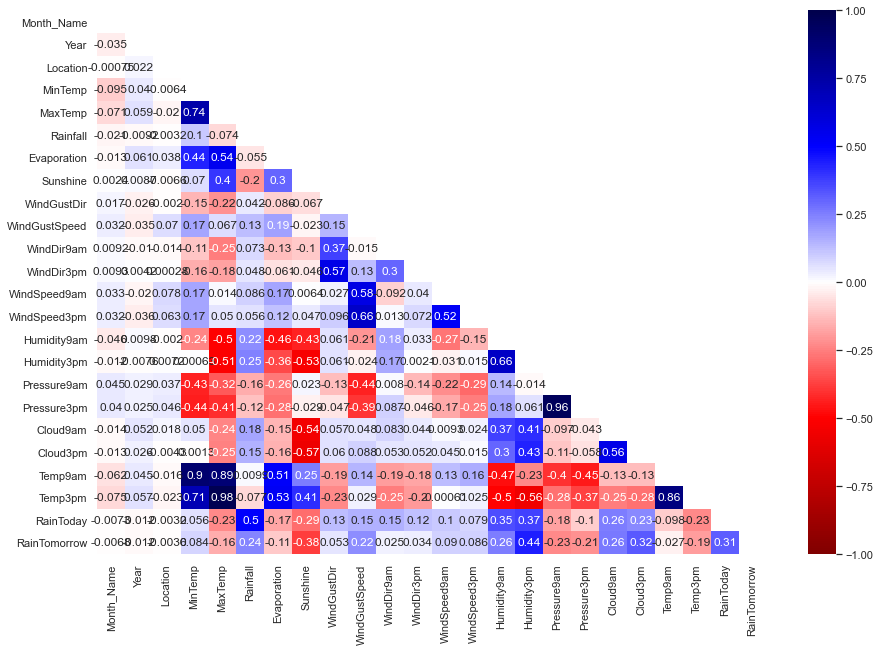

In [27]:
upper = np.triu(weather_df.corr()) 
plt.figure(figsize=(15, 10))
sns.heatmap(weather_df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

## Variance Inflation Factor

In [28]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def vif(df):
    '''
    Calculate the VIF for each feature of df (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df.values, i)
                for i in range(df.shape[1])]
    
    return pd.Series(vif_data, index=df.columns)

In [30]:
vif(weather_df.iloc[:, :21])

Month_Name            3.764349
Year              34894.487064
Location              3.843686
MinTemp              41.633841
MaxTemp             147.139797
Rainfall              1.236875
Evaporation           5.100432
Sunshine             11.510178
WindGustDir           6.114281
WindGustSpeed        24.271051
WindDir9am            4.705837
WindDir3pm            5.989238
WindSpeed9am          6.514123
WindSpeed3pm         10.837741
Humidity9am          49.712771
Humidity3pm          30.912266
Pressure9am      394544.453617
Pressure3pm      387935.321015
Cloud9am              7.431671
Cloud3pm              8.585766
Temp9am             155.525111
dtype: float64

In [31]:
vif_df = weather_df[[ "Evaporation","Cloud3pm","WindGustSpeed","WindSpeed9am", "Humidity3pm", "Temp9am", "Sunshine", "Month_Name", "Location"]]

In [32]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]
  
print(vif_data)

         feature        VIF
0    Evaporation   4.802395
1       Cloud3pm   6.334472
2  WindGustSpeed  14.078869
3   WindSpeed9am   5.267665
4    Humidity3pm   7.806422
5        Temp9am  10.096271
6       Sunshine   6.170557
7     Month_Name   3.478061
8       Location   3.645295


## Pairplot

In [33]:
weather_feature_sel = weather_df[["Evaporation","Cloud3pm","WindGustSpeed","WindSpeed9am", "Humidity3pm", "Temp9am", "Sunshine", "Month_Name", "Location","RainTomorrow"]].copy()

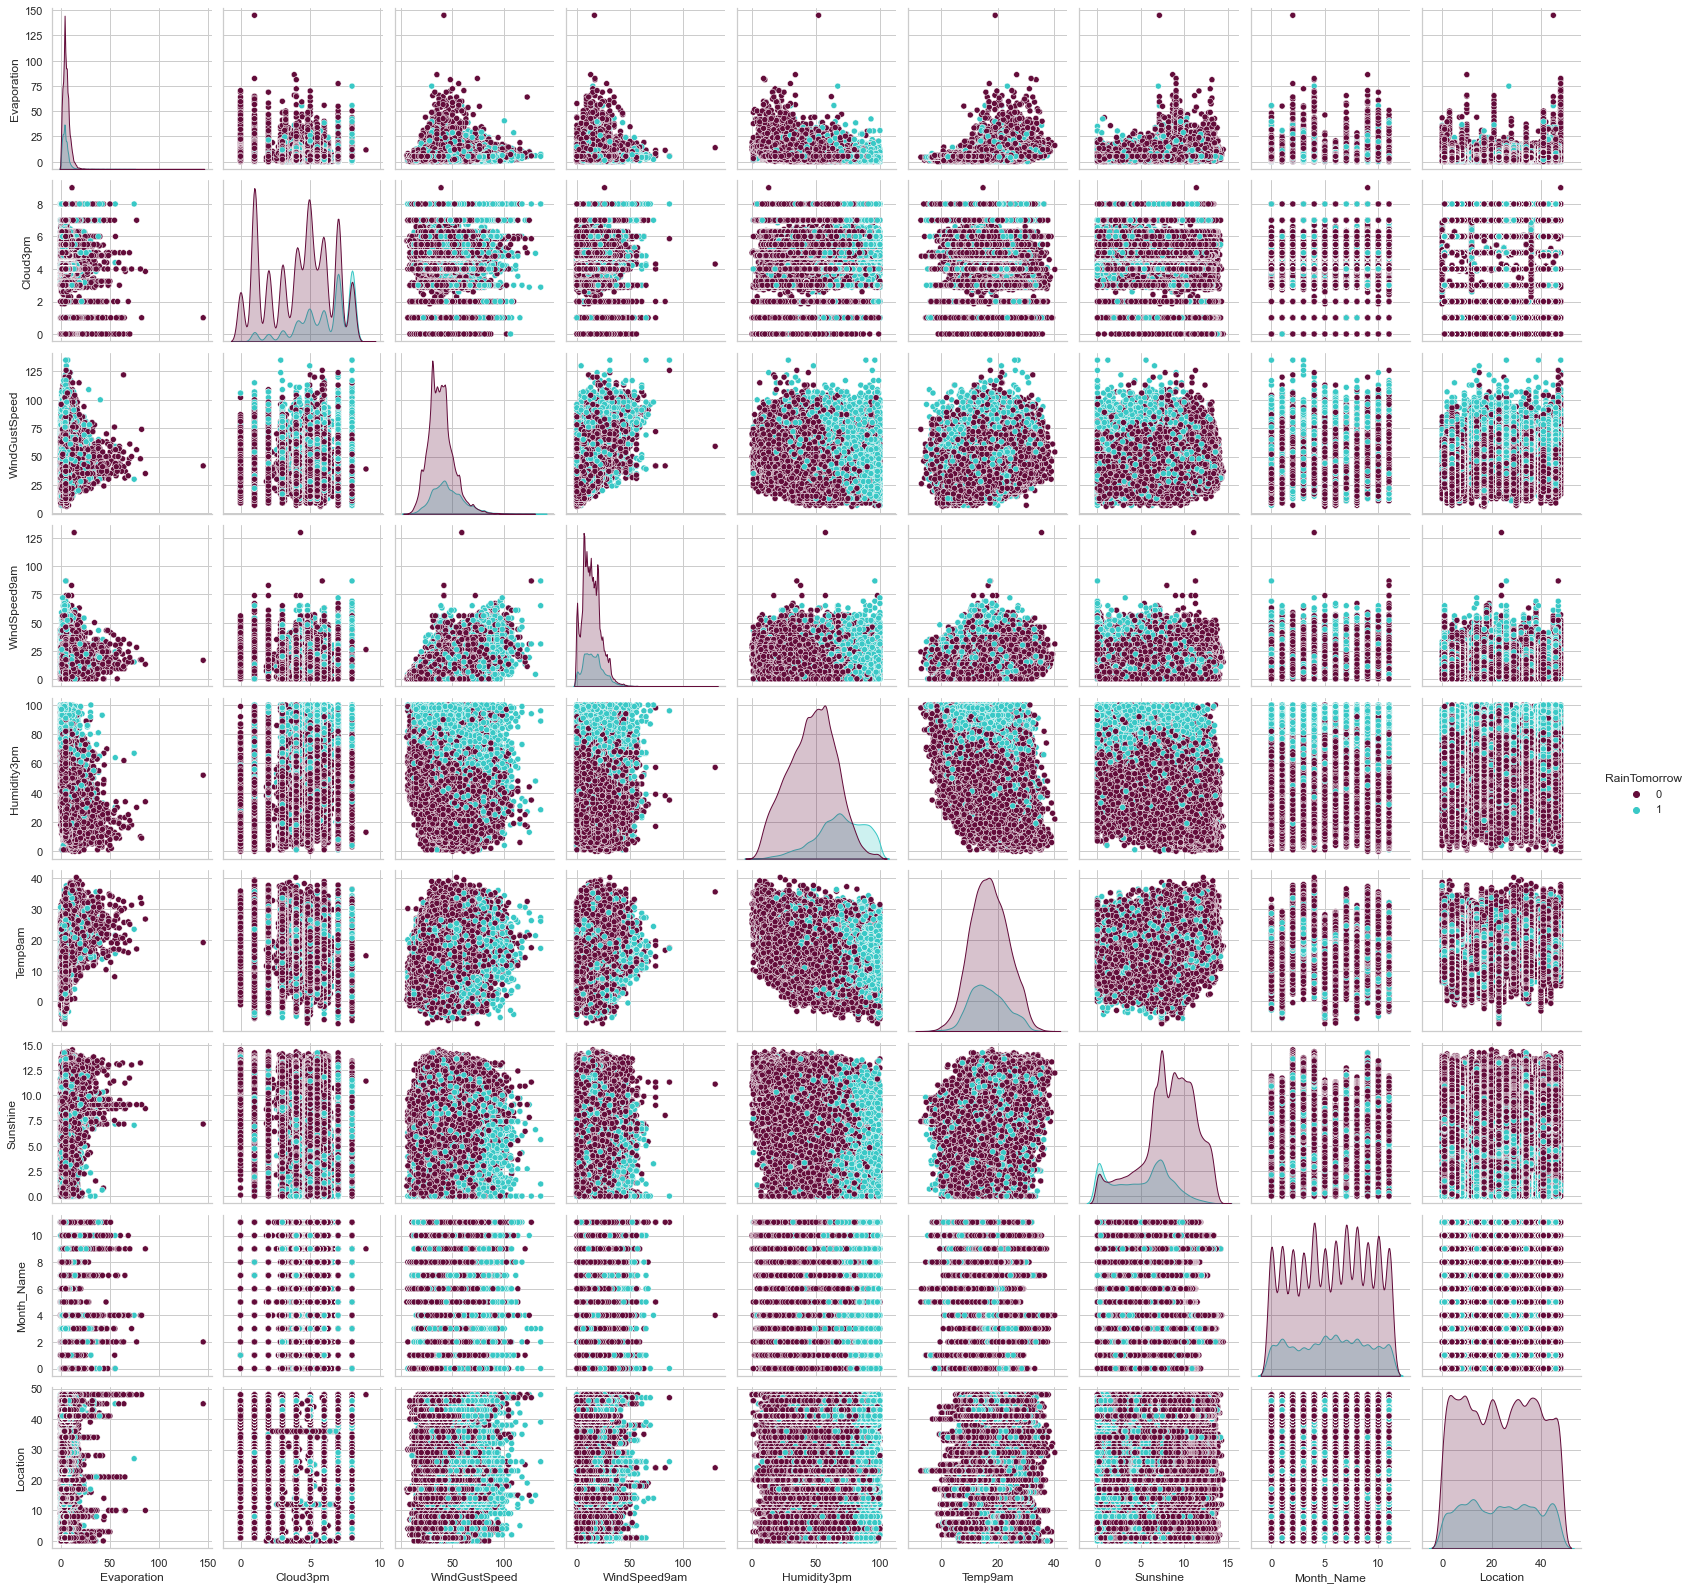

In [34]:
sns.pairplot(weather_feature_sel, hue = 'RainTomorrow');

## Final Dataframe with selected features

In [35]:
weather_feature_sel = weather_df_1[[ "Evaporation","Cloud3pm","WindGustSpeed","WindSpeed9am", "Humidity3pm", "Temp9am", "Sunshine", "Month_Name", "Location","RainTomorrow"]].copy()

In [36]:
%store weather_feature_sel

Stored 'weather_feature_sel' (DataFrame)
